# 7: Practice
In this exercise, you will practice using deep learning with artificial neural networks and the Pytorch library to build classification models. Note that Pytorch is **not** included in the Anaconda distribution by default. You have three options for using Pytorch to complete this assignment:

1. Install Pytorch locally (for free). You can see the directions on the [Pytorch website here](https://pytorch.org/get-started/locally/). Select the stable build, your operating system, Conda (for Anaconda), Python, and CPU to see install directions for your particular setup. (CUDA is used to support hardware acceleration with NVIDIA graphics cards and is not necessary for this course).

1. Use a [Duke OIT container](https://cmgr.oit.duke.edu/containers). Make sure to use the **PyTorch** one. If you have not already reserved your container, see the class website's [Resources & Getting Help](https://sites.duke.edu/compsci216f2021/resources-getting-help/) page.

1. Use Pytorch in a Jupyter notebook in the cloud (also for free). The easiest way to do this is with a Google colab notebook; Pytorch will already be available to you in this cloud environment. If you choose this option, go to the [Google colab website](https://colab.research.google.com) select "Upload" at the right side of the orange menu bar, and select this `.ipynb` file. You can then complete the assignment in colab and download the completed `.ipynb` file to turn in on Gradescope.

This practice assignment is tutorial style; in general we will provide the necessary code and simply ask you to run the code, observe what happens, and answer questions based on the code. One of the questions you will answer as a Sakai Quiz (with unlimited attempts), the rest you will answer in this notebook. The code in this assignment is based on the image classification example presented in the [Deep Learning with Pytorch: A 60 Minute Blitz](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html) tutorial and the [Pytorch Basics Tutorial](https://pytorch.org/tutorials/beginner/basics/intro.html#). You are welcome and encouraged to visit these and other Pytorch [tutorials](https://pytorch.org/tutorials/), [documentation](https://pytorch.org/docs/stable/index.html), and [recipes/examples](https://pytorch.org/tutorials/recipes/recipes_index.html) as needed or for your own interest and learning.

When you finish please confirm that your notebook and its output looks correct before submitting your .ipynb file (the notebook file) on gradescope. If you select Kernel -> Restart and Run All, please allow time for the code to finish executing; the code in this notebook may take a few minutes to run.

### Question 1: The Data
First, we import the necessary libraries and download the `CIFAR-10` dataset from Pytorch. The `CIFAR-10` dataset consists of 60,000 32 by 32 pixel color images in 10 classes, with 6,000 images per class. There are 50,000 training images and 10,000 test images. The classes of the images are things like `airplane`, `automobile`, `bird`, `cat`, `deer`, etc. You can read more about the dataset at the [curator's website](https://www.cs.toronto.edu/~kriz/cifar.html). 

Run the following code to import necessary libraries, download the data, and preview some of the images along with their classes. **Note that this step may take a few minutes depending on your internet speed**; the dataset is about 160 MB. Once you have downloaded the data once, rerunning the cell should be fast; it will verify that you already have the dataset rather than redownload every time.

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: q1
manual: true
points:
    - 4
-->

In [1]:
# Run but do not modify this code
# Imports all of the necessary Pytorch libraries

import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim

<!-- END QUESTION -->

In [2]:
# Run but do not modify this code
# Downloads, imports, and formats the CIFAR-10 image dataset. 
# May take a few minutes the first time you run it

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
train_dataloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
test_dataloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


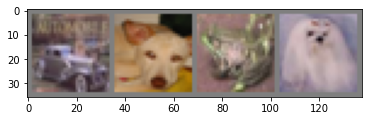

  car   dog  frog   dog


In [3]:
# Run but do not modify this code
# Displays random images from the CIFAR-10 image dataset

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(train_dataloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))
plt.show()

After running this code, `images` is a tensor containing the images displayed above. Run the code below to see the shape of the tensor, which is 4 by 3 by 32 by 32. Explain these values: What do these numbers represent in terms of the data?

In [4]:
# Run but do not modify this code
print(images.shape)

torch.Size([4, 3, 32, 32])


**Please write your answer for question 1 here**

### Answer 1

The first number (4) represents the number of images in the batch.
The second number (3) represents the dimensions of color (red, blue, green).
The final two numbers (32, 32) represent the dimensions of the image (units = pixels).

### Question 2
Now we will start by defining a (relatively) small multilayer perceptron for classifying these images.

In [5]:
# Run but do not modify this code
# Defines a multilayer perceptron class

class MultilayerPerceptron(nn.Module):
    def __init__(self):
        super(MultilayerPerceptron, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(32*32*3, 100),
            nn.ReLU(),
            nn.Linear(100, 25),
            nn.ReLU(),
            nn.Linear(25, 10),
            nn.ReLU()
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

Answer the following questions about this `MultilayerPerceptron` defined in the code above.
1. How many neurons are there in the input layer of the neural network?
2. How many **hidden** (that is, apart from the input and output layers) fully connected linear layers are there in the network?
3. What nonlinear activation function is the network using?
4. How many parameters are there for the connection between the input layer and the first hidden fully connected layer in the network?

**Please fill your answers to question2 on Sakai**


<!-- END QUESTION -->



### Question 3
Now we define our hyperparameters, initialize our model and optimizer, and define our training and testing process. The training uses stochastic gradient descent and prints the average training loss after every 1,250 batches or 5,000 images. After each of three epochs of training we print the average accuracy of the model on the held out test data; this is the percentage of the test images that our model correctly classifies.

In [6]:
# Run but do not modify this code
# Defines hyperparameters 

torch.manual_seed(216)
learning_rate = 1e-3
epochs = 3

In [7]:
# Run but do not modify this code
# Initializes the network, loss function, and optimizer

model = MultilayerPerceptron()
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [8]:
# Run but do not modify this code
# Defines the training optimization process and
# calculating accuracy on the held out testing data

def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    avg_batch_loss = 0.0
    for batch, (X, y) in enumerate(dataloader):
        
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        avg_batch_loss += loss.item()

        # Print average loss every 1250 batches
        if ((batch > 0) and (batch % 1250 == 0)):
            loss, current = loss.item(), batch * len(X)
            print(f"Average Loss: {avg_batch_loss/1250:>7f}  [{current:>5d}/{size:>5d}]")
            avg_batch_loss = 0.0
            
def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= size
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [9]:
# Run but do not modify this code
# Performs 'epochs' of training with stochastic
# gradient descent, printing average loss of every
# 1250 batches. Prints test accuracy after each
# epoch.
# NOTE: Optimization on 50,000 training samples may take
# some time, expect this code to run for several seconds 
# to a couple of minutes.

for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
Average Loss: 2.290818  [ 5000/50000]
Average Loss: 2.275833  [10000/50000]
Average Loss: 2.257851  [15000/50000]
Average Loss: 2.230425  [20000/50000]
Average Loss: 2.215106  [25000/50000]
Average Loss: 2.187408  [30000/50000]
Average Loss: 2.172581  [35000/50000]
Average Loss: 2.161808  [40000/50000]
Average Loss: 2.122573  [45000/50000]
Test Error: 
 Accuracy: 28.3%, Avg loss: 0.524415 

Epoch 2
-------------------------------
Average Loss: 2.087480  [ 5000/50000]
Average Loss: 2.074505  [10000/50000]
Average Loss: 2.063074  [15000/50000]
Average Loss: 2.047972  [20000/50000]
Average Loss: 2.048514  [25000/50000]
Average Loss: 2.032245  [30000/50000]
Average Loss: 2.012808  [35000/50000]
Average Loss: 1.996700  [40000/50000]
Average Loss: 2.012723  [45000/50000]
Test Error: 
 Accuracy: 33.0%, Avg loss: 0.496114 

Epoch 3
-------------------------------
Average Loss: 1.983893  [ 5000/50000]
Average Loss: 1.991305  [10000/50000]
Average Loss: 1.

Answer the following questions about the training/testing in the code above. For parts 2, 3, and 4 answer the first question in Sakai and include that answer in your response to the second question to make manual grading easier.

1. There are 10 neurons in the output layer of the model. How does the code in `test_loop` predict a single class as an integer given the 10 values output by the model during forward propagation?

2. After 3 epochs of training, is our model performing better than randomly guessing the class? If yes, how much? If no, how can you tell?

3. Suppose we double the sizes of the hidden fully connected layers in the model. Would you expect the model to achieve better (lower) or worse (higher) loss during training? Briefly explain your answer.

4. Again suppose we double the sizes of the hidden fully connected layers in the model. Would you expect training the model with stochastic gradient descent over two epochs to take less or more time? Briefly explain your answer.

**Please also answer the multiple choice questions on Sakai to test your understanding and get full credit for question3**

### Answer 3

1. It determines which class the image most likely belongs to (using the argmax function), where each output value corresponds to a certain class.

2. Yes, it is performing better. Since there are 10 classes, we would expect random chance to have 10% accuracy (1/10th chance). Our models yields a 35% accuracy by epoch 3. We can tell by the significantly higher accuracy in our model, as well as the fact that the accuracy increases in each epoch.

3. We would expect the model to achieve better (lower) loss during training because as the number of neurons increase (either width or depth), the performance improves, leading to lower loss.

4. More time, because doubling the size of the hidden layers will require more calcuations to be done, as there are more connections between the neurons.

<!-- END QUESTION -->



### Question 4
Now we define a convolutional neural network for the same classification task.

In [10]:
# Run but do not modify this code
# Defines a convolutional neural network class

class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv_pool_stack = nn.Sequential(
            nn.Conv2d(3, 6, 5),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(6, 16, 5),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
        )
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(16*5*5, 100),
            nn.ReLU(),
            nn.Linear(100, 25),
            nn.ReLU(),
            nn.Linear(25, 10),
            nn.ReLU()
        )

    def forward(self, x):
        convolved = self.conv_pool_stack(x)
        flattened = self.flatten(convolved)
        logits = self.linear_relu_stack(flattened)
        return logits

Answer the following questions about the `ConvNet` class defined in the code above. For each part, answer the question in Sakai and then include your answer with a brief explanation of your answer in the notebook. You do not need to give the exact number of parameters.

1. The first hidden fully connected linear layer in the network, after convolving, pooling, and flattening, has $16 \times 5 \times 5 = 400$ neurons. This is much less than the size of the input for the `MultilayerPerceptron` model. What part of the `ConvNet` most accounts for this reduction in the input size?

2. Are there more parameters in the `conv_pool_stack` or the `linear_relu_stack` portions of the network?

3. Does this model have more or fewer total parameters than the `MultilayerPerceptron` defined previously?

**Please also answer the multiple choice questions on Sakai to test your understanding and get full credit for question4**

### Answer4

1. The pooling layer. It is a dimension reduction step that takes a group of values near each other and pools them into a single value according to some function to improve computational tractibility.

2. The linear_relu_stack. This is because of the 100 neurons in the first hidden layer adding a significant number of parameters.

3. Fewer. This is because the pooling reduces the number of inputs significantly.

<!-- END QUESTION -->



### Question 5
Now we define our hyperparameters, initialize our model and optimizer, and define our training and testing process. As for the `MultilayerPerceptron`, the training uses stochastic gradient descent and prints the average training loss after every 1,250 batches or 5,000 images. After each of three epochs of training we print the average accuracy of the model on the held out test data; this is the percentage of the test images that our model correctly classifies.

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: q5
manual: true
points:
    - 4
    - 2
-->

In [11]:
# Run but do not modify this code

torch.manual_seed(216)
learning_rate = 1e-3
epochs = 3
conv_model = ConvNet()
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(conv_model.parameters(), lr=learning_rate)

In [12]:
# Run but do not modify this code
# Performs 'epochs' of training with stochastic
# gradient descent, printing average loss of every
# 1250 batches. Prints test accuracy after each
# epoch.
# NOTE: Optimization on 50,000 training samples may take
# some time, expect this code to run for several seconds 
# to a couple of minutes.

for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, conv_model, loss_fn, optimizer)
    test_loop(test_dataloader, conv_model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
Average Loss: 2.305754  [ 5000/50000]
Average Loss: 2.303169  [10000/50000]
Average Loss: 2.302089  [15000/50000]
Average Loss: 2.300232  [20000/50000]
Average Loss: 2.299101  [25000/50000]
Average Loss: 2.298133  [30000/50000]
Average Loss: 2.296784  [35000/50000]
Average Loss: 2.293336  [40000/50000]
Average Loss: 2.288095  [45000/50000]
Test Error: 
 Accuracy: 22.6%, Avg loss: 0.569339 

Epoch 2
-------------------------------


RuntimeError: DataLoader worker (pid 85654) is killed by signal: Unknown signal: 0. 

Answer the following questions about this the training/testing in the code above. For part 2 answer the first question in Sakai and include that answer in your explanation to make manual grading easier.

1. Compare the results with the `ConvNet` to those obtained with the `MultilayerPerceptron`. In particular, what difference do you observe about the training loss of the two models during the third epoch of training?

2. Based on your observation of the training loss of the `ConvNet` during the third epoch of training, do you think increasing the `learning_rate` (the step size of stochastic gradient descent) somewhat (say, from 0.001 to 0.01) would result in better or worse accuracy during testing after three epochs of training? Briefly explain your answer. 

### Answer5

**Please also answer the multiple choice questions on Sakai to test your understanding and get full credit for question5**

1. The ConvNet has a lower traning loss during the third epoch of training.

2. Since we only have 3 training epochs, increasing the learning rate may lead to better accuracy. This is because the model can converge and improve faster than with a lower learning rate.